# Task-1: Iris Flower Classification.
## ● Use measurements of Iris flowers (setosa, versicolor, virginica) as input data.
## ● Train a machine learning model to classify the species based on these measurements.
## ● Use libraries like Scikit-learn for easy dataset access and model building.
## ● Evaluate the model’s accuracy and performance using test data.
## ● Understand basic classification concepts in machine learning.

In [421]:
# Displaying Iris images:
from IPython.display import Image
Image(url = "https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

# Importing Libraries:

In [422]:
# Import libraries
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [423]:
import warnings 
warnings.filterwarnings('ignore')

# Loading the DataSet:

In [424]:
path = kagglehub.dataset_download("jillanisofttech/iris-dataset-uci")
print("Path to dataset files:", path)

print(os.listdir(path))
iris_data = os.path.join(path,"Iris.csv")

iris = pd.read_csv(iris_data)
print(iris.head(10))

Path to dataset files: C:\Users\Majji\.cache\kagglehub\datasets\jillanisofttech\iris-dataset-uci\versions\1
['Iris.csv']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


# Describing the Data:

In [425]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Size & Shape of Dataset:

In [426]:
print(iris.size)
print(iris.shape)

900
(150, 6)


# Columns of DataFrame:

In [427]:
print("Columns in DataFrame:", iris.columns.tolist())


Columns in DataFrame: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [428]:
label_col = 'Species'  # or 'class' if that’s what df.columns shows


# Pairplot of Iris (Dataset):

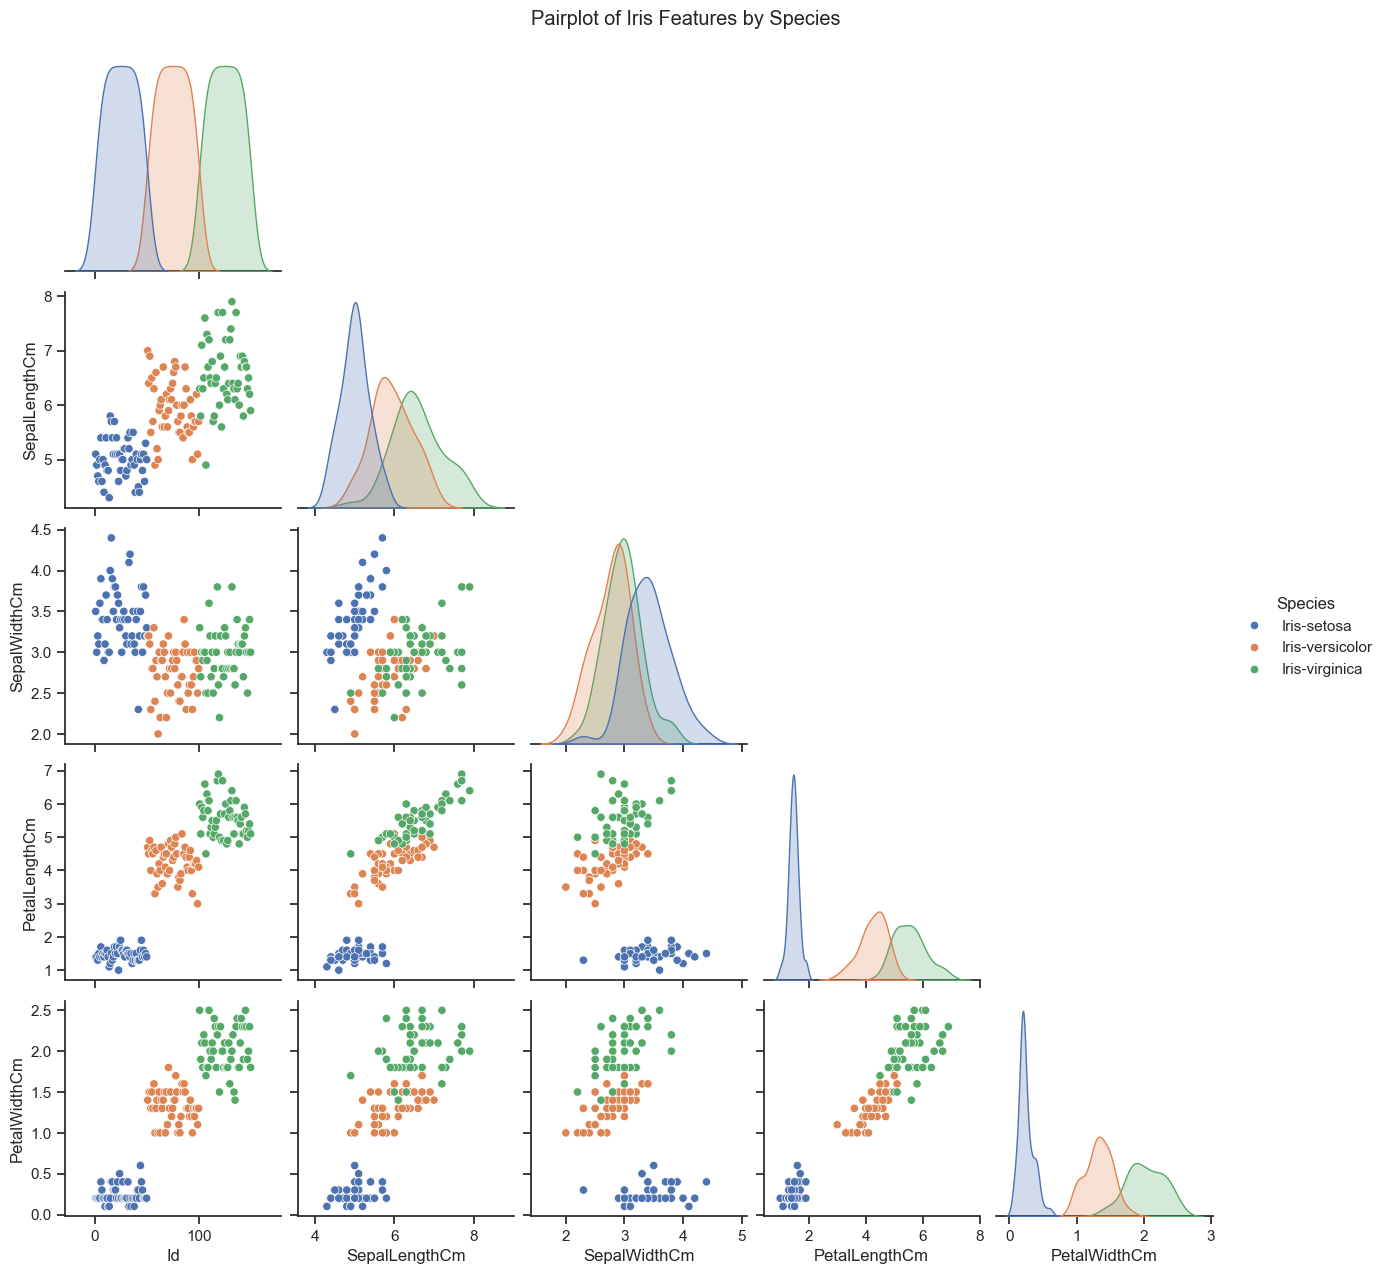

In [429]:
if label_col not in iris.columns:
    raise KeyError(f"Label column '{label_col}' not found in DataFrame")

iris[label_col] = iris[label_col].astype('category')

sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue=label_col, corner=True, height=2.5, aspect=1.0)

plt.suptitle("Pairplot of Iris Features by " + label_col, y=1.02)
plt.show()

In [430]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [431]:
print(iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [432]:
print(iris['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Random Forest (Accuracy, Classification Report, Confusion Matrix):

In [433]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns  # to load the iris dataset

# Load the iris dataset
iris = sns.load_dataset('iris')  # Use this only if you're not loading from CSV

# Check column names
print("Available columns:", iris.columns)

# Define feature matrix X and label vector y
X = iris.drop('species', axis=1)
y = iris['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Available columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Barplot:

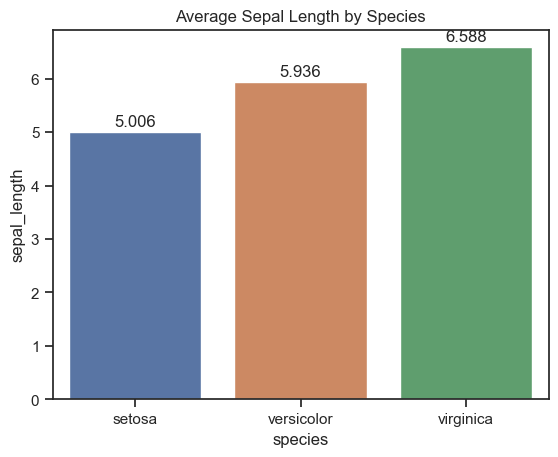

In [434]:
# Load dataset
iris = sns.load_dataset("iris")

# Plot barplot
ax = sns.barplot(x='species', y='sepal_length', hue='species', data=iris, ci=None)

# Annotate bars with values
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.title("Average Sepal Length by Species")
plt.show()

# Violin plot:

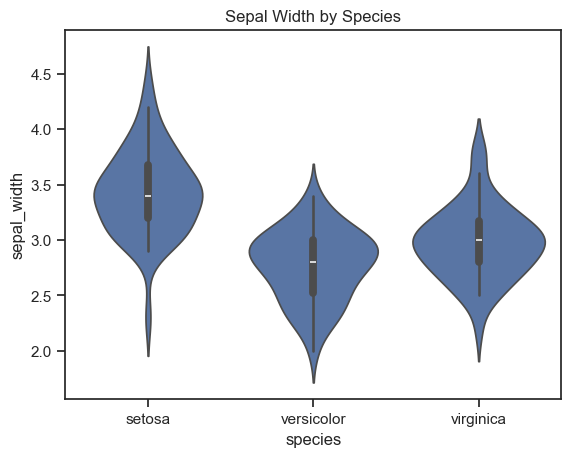

In [435]:
# Load seaborn's built-in iris dataset
iris = sns.load_dataset("iris")

# Create violin plot
sns.violinplot(x='species', y='sepal_width', data=iris)

plt.title('Sepal Width by Species')
plt.show()

# Heatmap:

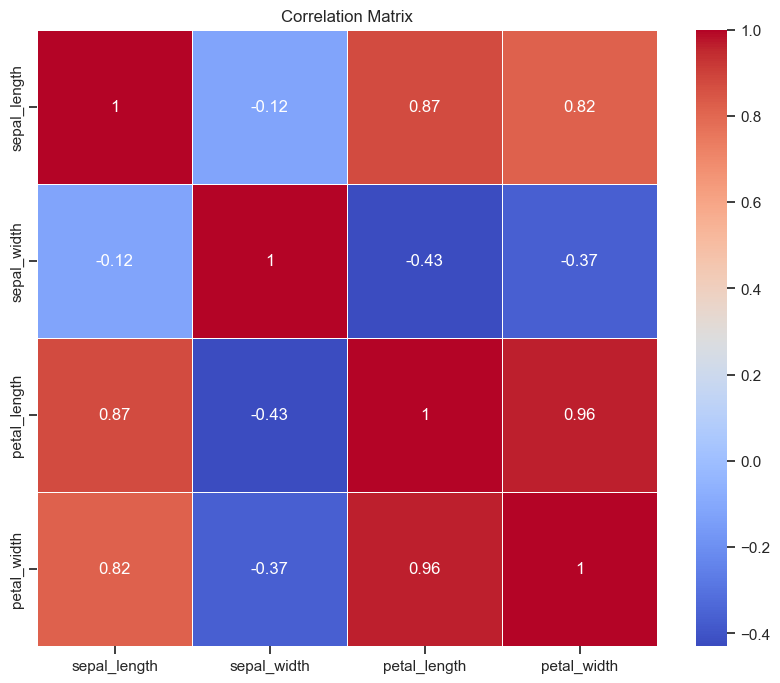

In [436]:
# Load dataset (if not already loaded)
iris = sns.load_dataset('iris')  # or use pd.read_csv('your_file.csv')

# Select only numeric columns
numeric = iris.select_dtypes(include=['number'])

# Compute Pearson correlation matrix
corr_mat = numeric.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# KDE-plot:

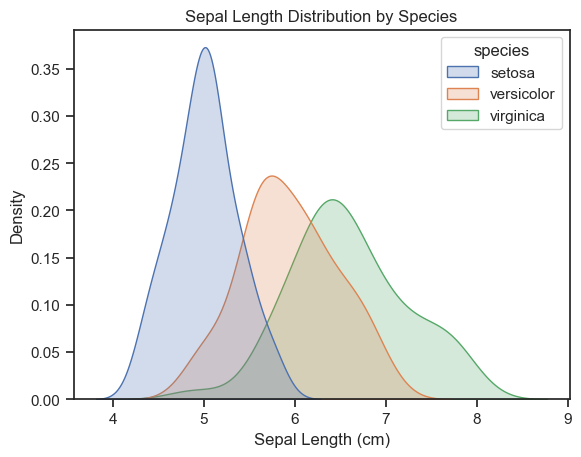

In [437]:
# KDE plot for Sepal Length by Species
sns.kdeplot(x='sepal_length', hue='species', data=iris, fill=True)

plt.title('Sepal Length Distribution by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Density')
plt.show()

# Boxplot:

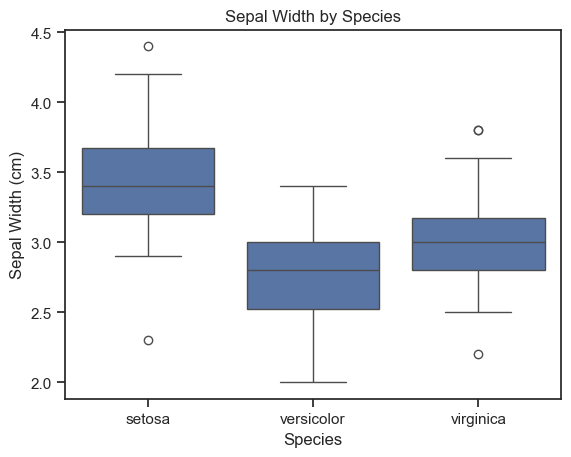

In [438]:
# Sepal Width by Species
sns.boxplot(x='species', y='sepal_width', data=iris)

plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Swarmplot:

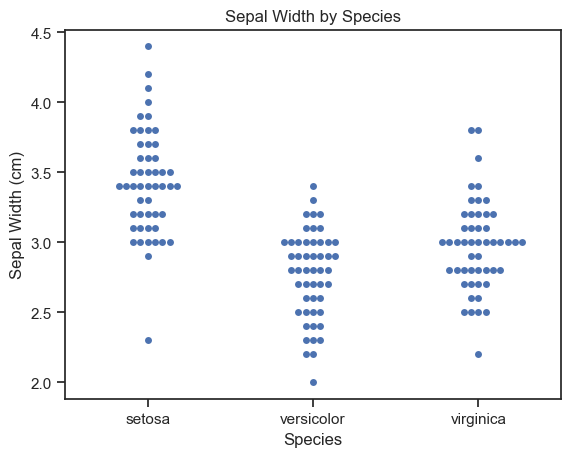

In [439]:
sns.swarmplot(x='species', y='sepal_width', data=iris)

plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Scatterplot:

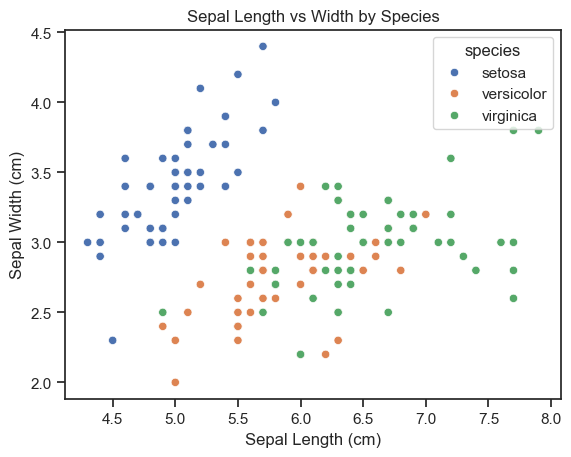

In [440]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

plt.title('Sepal Length vs Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [441]:
from sklearn.datasets import load_iris
import pandas as pd

iris_sklearn = load_iris()
iris = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris['Species'] = iris_sklearn.target

In [442]:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Species']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'Species']

# Columns of Index:

In [443]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['Species'] = data.target

# Check columns
print(iris.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')


# Scatterplot:

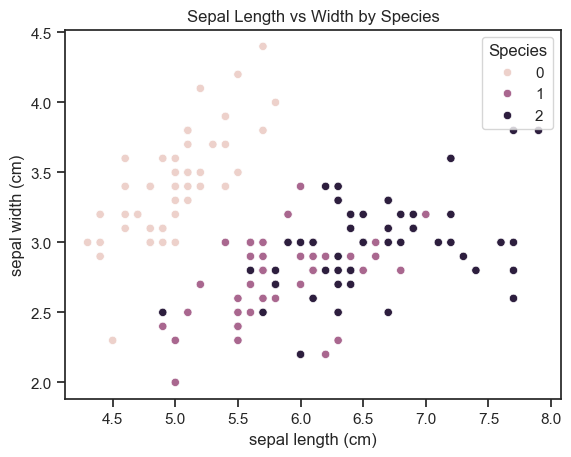

In [444]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=iris)
plt.title('Sepal Length vs Width by Species')
plt.show()

# Lineplot:

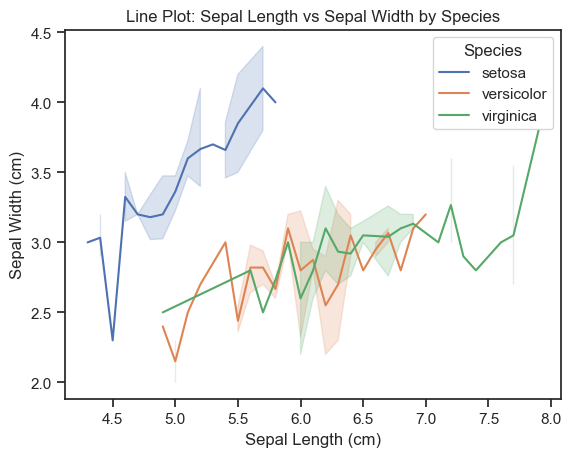

In [447]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['Species'] = data.target

# Convert target numbers to species names (optional but better for visualization)
iris['Species'] = iris['Species'].map({i: name for i, name in enumerate(data.target_names)})

# Line plot
sns.lineplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=iris)
plt.title('Line Plot: Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

# Countplot:

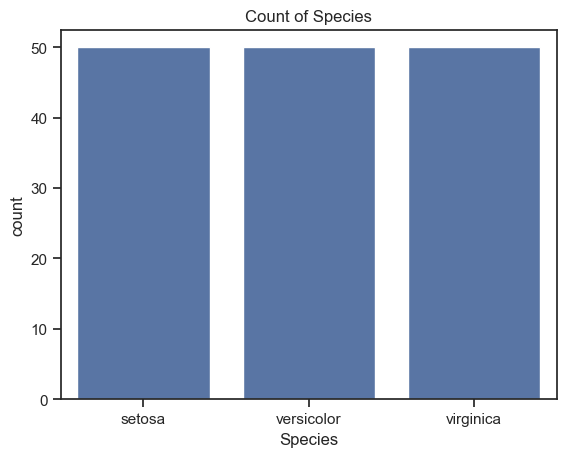

In [446]:
sns.countplot(x = 'Species', data = iris)
plt.title('Count of Species')
plt.show()